# 🏦 Bank Personal Loan Modeling

## 📊 Project Overview

Model customer behavior regarding personal loans using bank data. Steps include data cleaning, EDA, feature engineering, and deriving insights for business decisions.

## ✅ Step 1: Load & Clean the Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('Bank_Personal_Loan.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


In [2]:
# Inspect data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


In [3]:
# Fix CCAvg column if it contains '/' instead of '.'
df['CCAvg'] = df['CCAvg'].astype(str).str.replace('/', '.').astype(float)

## ✅ Step 2: Univariate Analysis

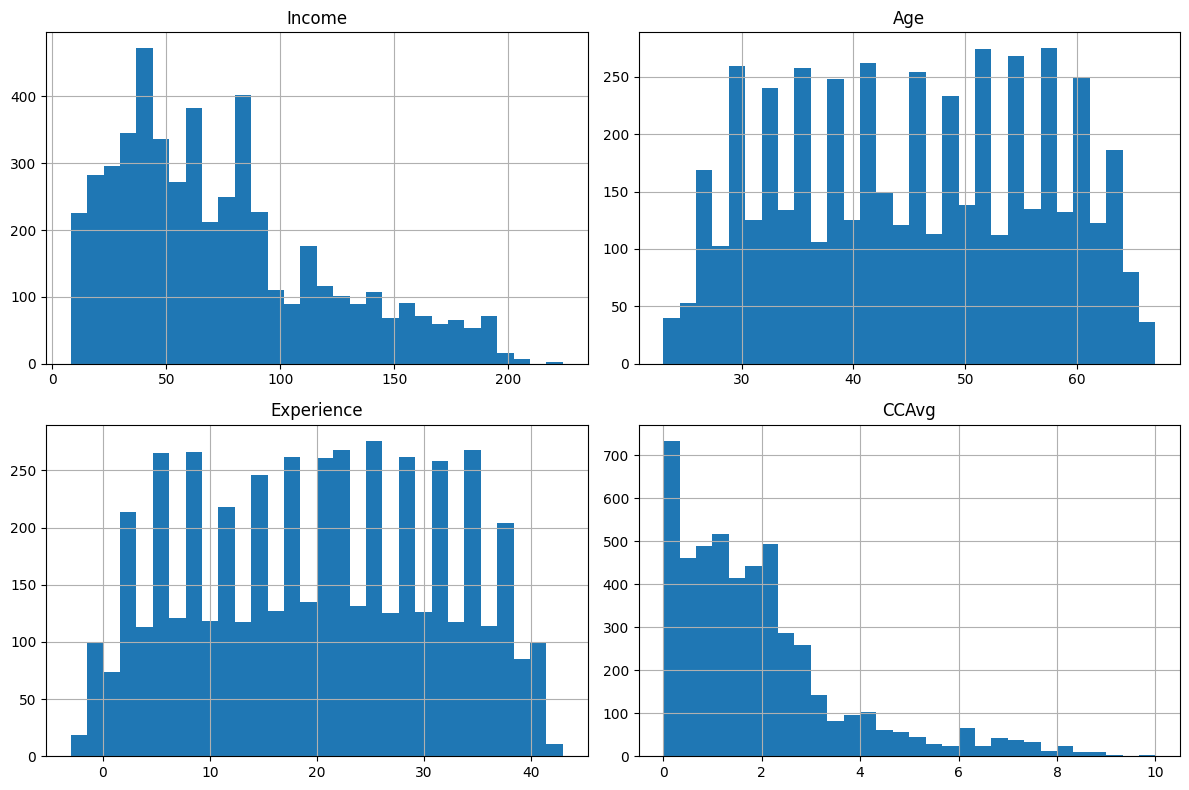

In [4]:
# Histogram for numeric columns
numeric_cols = ['Income', 'Age', 'Experience', 'CCAvg']
df[numeric_cols].hist(bins=30, figsize=(12,8))
plt.tight_layout()
plt.show()

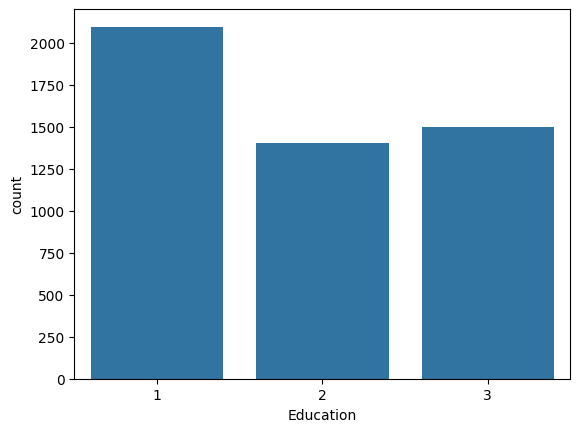

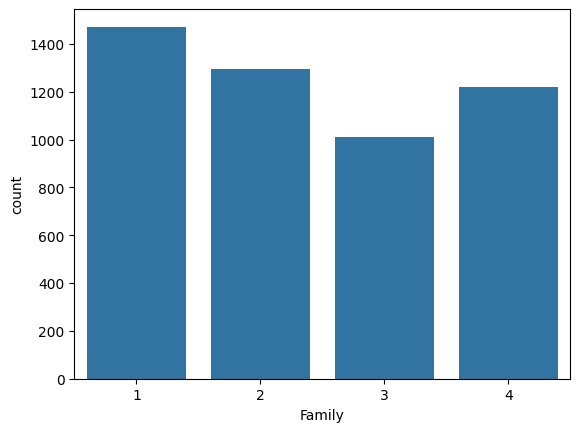

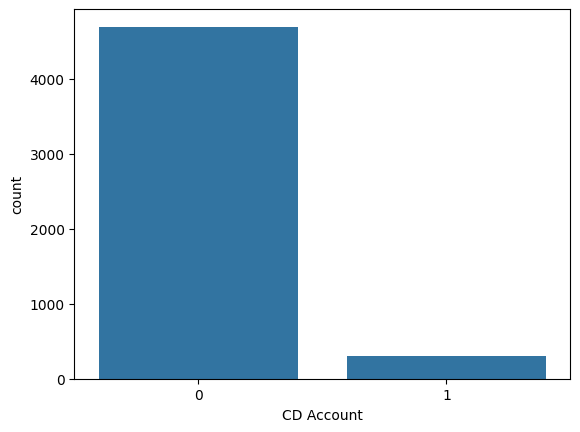

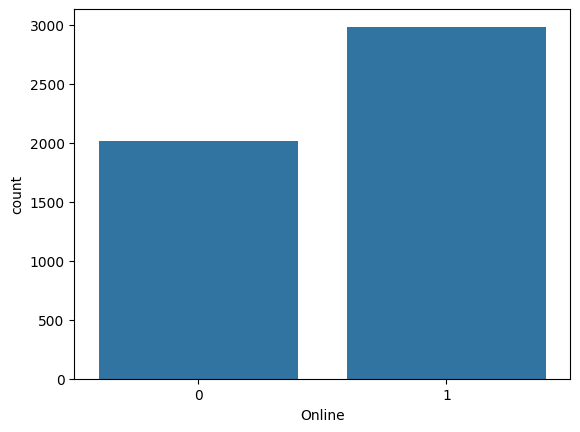

In [5]:
# Barplot for categorical columns
categorical_cols = ['Education', 'Family', 'CD Account', 'Online']
for col in categorical_cols:
    sns.countplot(data=df, x=col)
    plt.show()

## ✅ Step 3: Bivariate & Multivariate Analysis

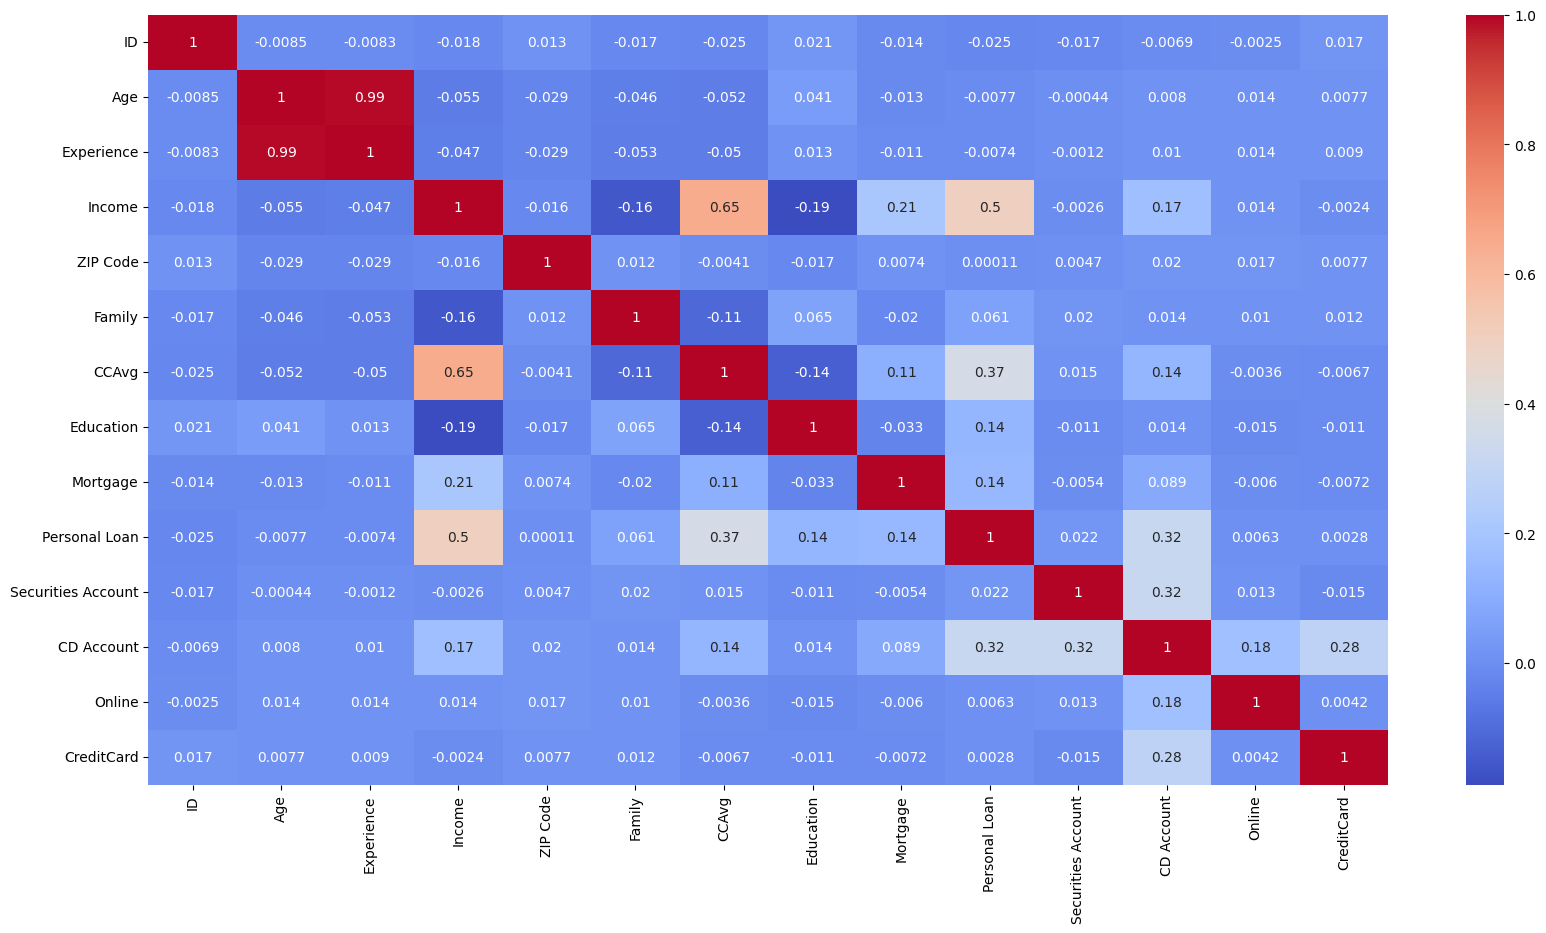

In [6]:
# Correlation heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

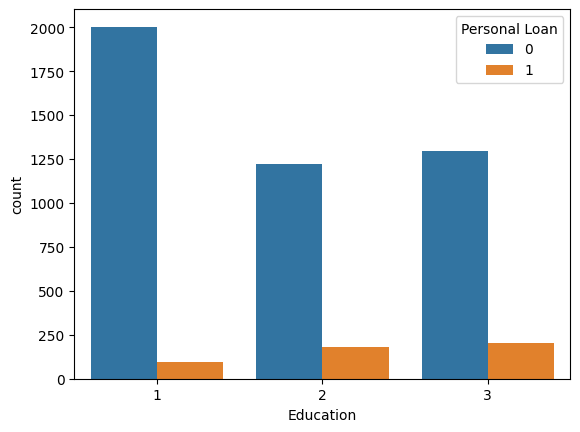

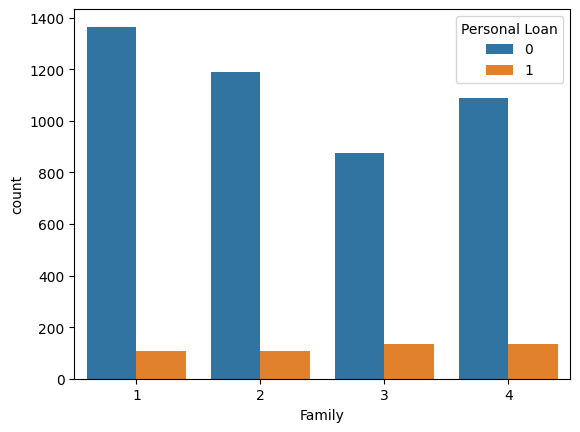

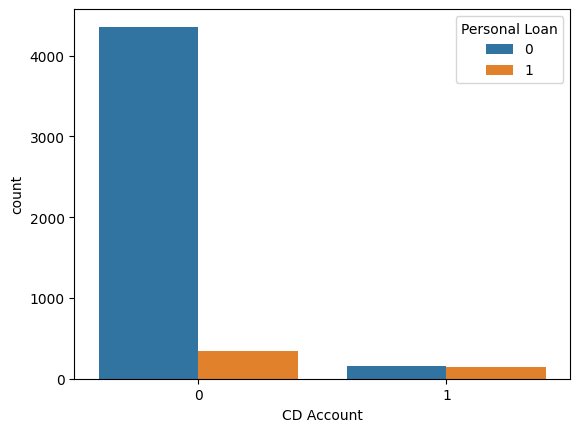

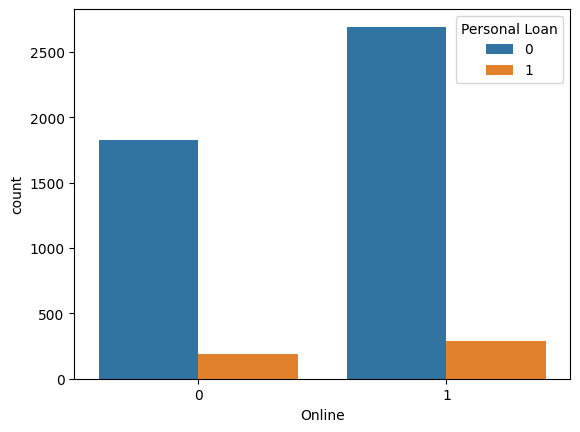

In [7]:
# Countplot with target
for col in categorical_cols:
    sns.countplot(data=df, x=col, hue='Personal Loan')
    plt.show()

## ✅ Step 4: Detect Missing and Aberrant Values

In [8]:
# Check for missing values
df.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIP Code,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal Loan,0


In [9]:
# Remove rows with negative experience
df = df[df['Experience'] >= 0]

In [10]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

## ✅ Step 5: Detect Outliers

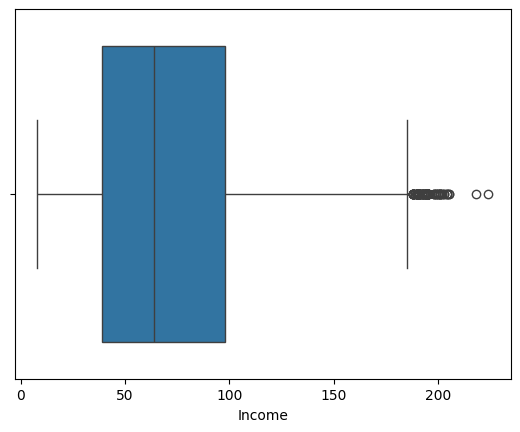

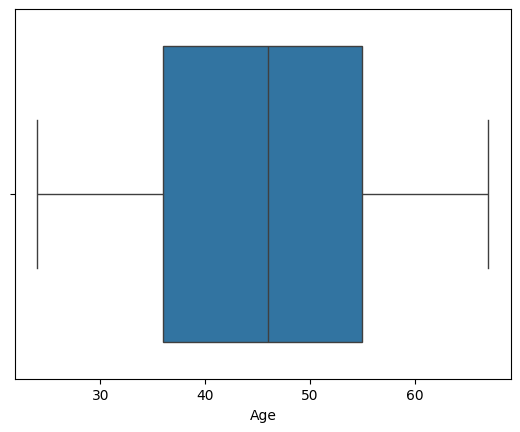

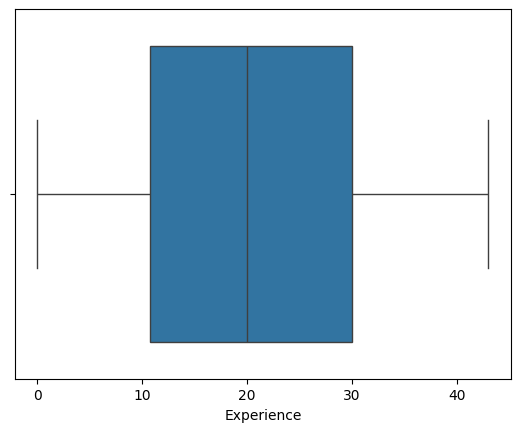

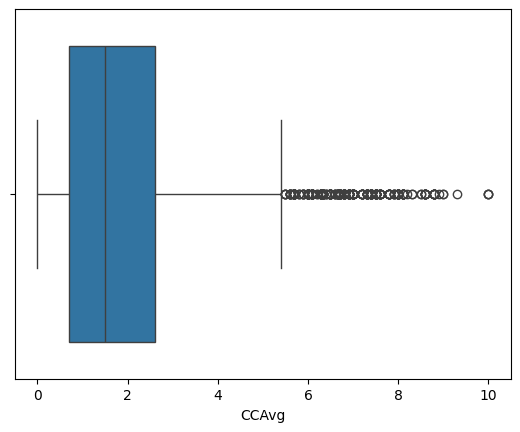

In [11]:
# Boxplots for outliers
for col in numeric_cols:
    sns.boxplot(data=df, x=col)
    plt.show()

In [12]:
# IQR method for outlier detection
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

## ✅ Step 6: Feature Engineering

In [13]:
# Create new features
df['High_Income'] = (df['Income'] > 100).astype(int)
df['CC_Income_Ratio'] = df['CCAvg'] / df['Income']
df['Loan_Segment'] = df['Income'].apply(lambda x: 'High' if x > 100 else 'Low') + '_' + df['Education'].astype(str)

In [14]:
# One-hot encode categorical columns
df = pd.get_dummies(df, columns=['Education', 'Loan_Segment'], drop_first=True)

In [15]:
# Drop irrelevant columns
df.drop(columns=['ID', 'ZIP Code'], inplace=True)

## ✅ Step 7: Final Business Insights


**Key Insights:**
1. High income & educated customers are more likely to take loans.
2. CD account holders have higher loan acceptance — cross-sell loans.
3. High CC_Income_Ratio can flag credit dependency.
4. Online users engage more — promote digital loan products.
